In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from datetime import datetime

In [3]:
df=pd.read_csv('2019-nCoV-cases-JHU.csv',parse_dates=True)

In [4]:
df.head()

,Date,Province,Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,3/3/2020 12:00,Hubei,Mainland China,2020-03-03T11:43:02,67217,2835,36208,30.9756,112.2707
1,3/3/2020 12:00,NaN,South Korea,2020-03-03T09:43:02,5186,28,30,36.0000,128.0000
2,3/3/2020 12:00,NaN,Italy,2020-03-03T20:03:06,2502,79,160,43.0000,12.0000
3,3/3/2020 12:00,NaN,Iran,2020-03-03T14:23:03,2336,77,291,32.0000,53.0000
4,3/3/2020 12:00,Guangdong,Mainland China,2020-03-03T10:23:10,1350,7,1101,23.3417,113.4244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 9 columns):
Date           4709 non-null object
Province       3277 non-null object
Region         4709 non-null object
Last Update    4709 non-null object
Confirmed      4709 non-null int64
Deaths         4709 non-null int64
Recovered      4709 non-null int64
Lat            417 non-null float64
Long           417 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 331.2+ KB


In [6]:
df_clean=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df_clean.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 8 columns):
Province/State    8174 non-null object
Country/Region    18056 non-null object
Lat               18056 non-null float64
Long              18056 non-null float64
Date              18056 non-null datetime64[ns]
Confirmed         18056 non-null int64
Deaths            18056 non-null int64
Recovered         18056 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.1+ MB


In [8]:
## data cleaning

In [9]:
df_clean['Province/State'].unique()

array([nan, 'British Columbia', 'New South Wales', 'Victoria',
       'Queensland', 'South Australia', 'From Diamond Princess',
       'Western Australia', 'Tasmania', 'Northern Territory', 'Ontario',
       'Alberta', 'Quebec', 'Washington', 'New York', 'California',
       'Massachusetts', 'Diamond Princess', 'Grand Princess', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hubei', 'France', 'G

In [10]:
df_clean.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,18056.000000,18056.000000,18056.000000,18056.000000,18056.000000
mean,25.328500,6.276101,287.658784,10.086453,104.258861
std,23.376056,80.678705,3314.112996,152.437478,1795.456643
min,-41.454500,-157.498300,0.000000,0.000000,0.000000
25%,12.776750,-71.516375,0.000000,0.000000,0.000000
50%,31.808700,11.555750,0.000000,0.000000,0.000000
75%,42.181825,65.480925,9.000000,0.000000,0.000000
max,71.706900,178.065000,67800.000000,5476.000000,59433.000000


In [11]:
# We will added under treatment column 
df_clean['under_treatment']=df_clean['Confirmed']-df_clean['Deaths']-df_clean['Recovered']


In [12]:
df_clean.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,under_treatment
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [13]:
df_clean['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [14]:
## Filling missing data in Province/State
df_clean[['Province/State']]=df_clean[['Province/State']].fillna(value='')
df_clean.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,under_treatment
0,,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0


In [15]:
## SInce the data is time series , we will find when was first and last entry
df_clean[['Date']].min()

Date   2020-01-22
dtype: datetime64[ns]

In [16]:
df_clean[['Date']].max()

Date   2020-03-22
dtype: datetime64[ns]

In [17]:
print('First entry',df_clean[['Date']].min())
print('Last  entry',df_clean[['Date']].max())
print('Total time period',df_clean[['Date']].max()-df_clean[['Date']].min())

First entry Date   2020-01-22
dtype: datetime64[ns]
Last  entry Date   2020-03-22
dtype: datetime64[ns]
Total time period Date   60 days
dtype: timedelta64[ns]


In [18]:
# Data analysis

In [19]:
# Total no of confirm case and death over the time


In [20]:
df_clean_date=df_clean.groupby('Date')['Confirmed','Deaths','Recovered','under_treatment'].sum().reset_index()

In [21]:
print('First 5 rows',df_clean_date.head())
print('***'*100)
print('Last 5 rows',df_clean_date.tail())

First 5 rows         Date  Confirmed  Deaths  Recovered  under_treatment
0 2020-01-22        554      17         28              509
1 2020-01-23        652      18         30              604
2 2020-01-24        939      26         36              877
3 2020-01-25       1432      42         39             1351
4 2020-01-26       2113      56         52             2005
************************************************************************************************************************************************************************************************************************************************************************************************************
Last 5 rows          Date  Confirmed  Deaths  Recovered  under_treatment
56 2020-03-18     214910    8733      83207           122970
57 2020-03-19     242708    9867      84854           147987
58 2020-03-20     272166   11299      87256           173611
59 2020-03-21     304524   12973      91499           200052
60 2020-0

C:\Users\nanao\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



(array([737446., 737453., 737456., 737463., 737470., 737477., 737484.,
        737485., 737492., 737499., 737506.]),
 <a list of 11 Text xticklabel objects>)

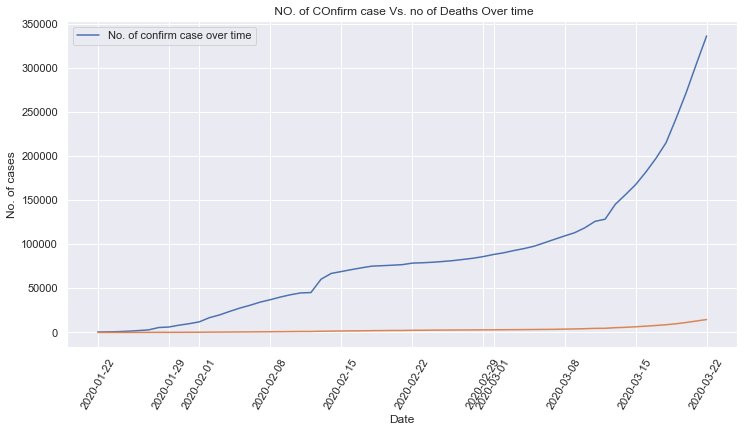

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Confirmed',data=df_clean_date)
plt.show
sns.lineplot(x='Date',y='Deaths',data=df_clean_date)
plt.show
plt.ylabel('No. of cases')
plt.legend(['No. of confirm case over time'])
plt.title(' NO. of COnfirm case Vs. no of Deaths Over time')

plt.xticks(rotation=60)

(array([737446., 737453., 737456., 737463., 737470., 737477., 737484.,
        737485., 737492., 737499., 737506.]),
 <a list of 11 Text xticklabel objects>)

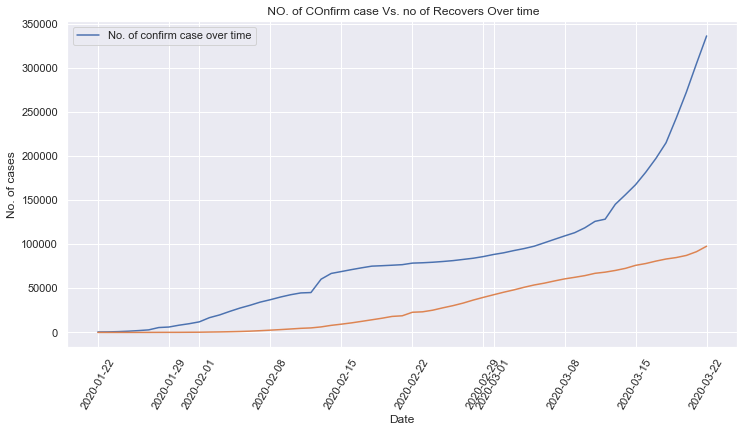

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Confirmed',data=df_clean_date)
plt.show
sns.lineplot(x='Date',y='Recovered',data=df_clean_date)
plt.show
plt.ylabel('No. of cases')
plt.legend(['No. of confirm case over time'])
plt.title(' NO. of COnfirm case Vs. no of Recovers Over time')

plt.xticks(rotation=60)

(array([737446., 737453., 737456., 737463., 737470., 737477., 737484.,
        737485., 737492., 737499., 737506.]),
 <a list of 11 Text xticklabel objects>)

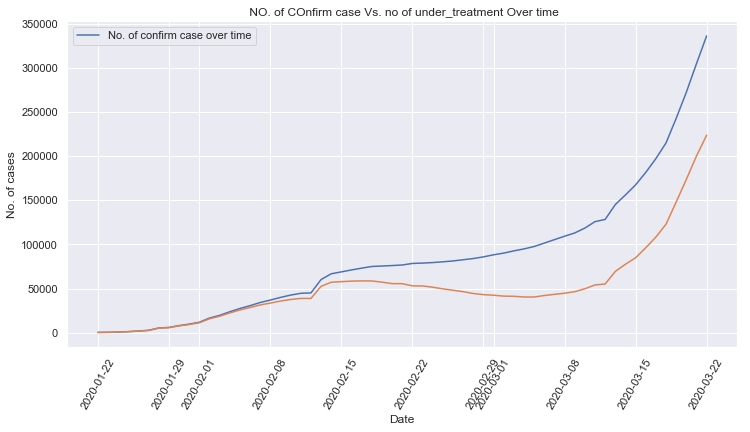

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.lineplot(x='Date',y='Confirmed',data=df_clean_date)
plt.show
sns.lineplot(x='Date',y='under_treatment',data=df_clean_date)
plt.show
plt.ylabel('No. of cases')
plt.legend(['No. of confirm case over time'])
plt.title(' NO. of COnfirm case Vs. no of under_treatment Over time')

plt.xticks(rotation=60)

### Observation:
<br> From above analysis we found below observation:<br>
1) Worldwise, the nos. of confirmed case is increasing exponiantailly<br>
2) NOs. od death os also increasing smaothly ,not like confirm cases<br>
3) However nos. of recoverly is showing very less stiff . <br>
This is not a good sign. That means we can see nos. of under-treament is increasing exponiantially.<br>
There is a big challege to control the fatality . 

In [25]:
## let us find out the top 10 cinfirm cases country and thier analysis

In [26]:
df_clean_country=df_clean.groupby('Country/Region')['Confirmed','Deaths','Recovered','under_treatment'].sum().reset_index().sort_values('Confirmed',ascending=False)

In [27]:
df_clean_country.head()

,Country/Region,Confirmed,Deaths,Recovered,under_treatment
33,China,3449730,116138,1714398,1619194
81,Italy,438821,33959,43930,360932
77,Iran,231132,13124,71998,146010
144,South Korea,172802,1439,14972,156391
145,Spain,157432,7345,11793,138294


In [28]:
top_10=df_clean_country[:10]
top_10

,Country/Region,Confirmed,Deaths,Recovered,under_treatment
33,China,3449730,116138,1714398,1619194
81,Italy,438821,33959,43930,360932
77,Iran,231132,13124,71998,146010
144,South Korea,172802,1439,14972,156391
145,Spain,157432,7345,11793,138294
63,Germany,136101,395,1562,134144
160,US,123393,1747,98,121548
59,France,102465,2859,2560,97046
150,Switzerland,39168,393,242,38533
164,United Kingdom,29624,1100,741,27783


<function matplotlib.pyplot.show(*args, **kw)>

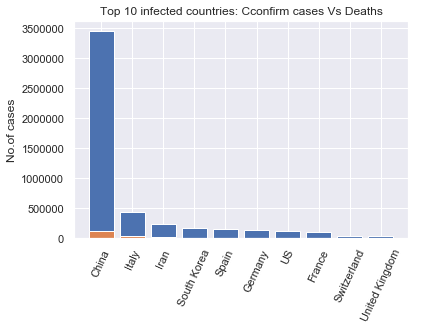

In [29]:
plt.bar(top_10['Country/Region'],top_10['Confirmed'])
plt.bar(top_10['Country/Region'],top_10['Deaths'])
plt.ylabel('No.of cases')
plt.title('Top 10 infected countries: Cconfirm cases Vs Deaths')
plt.xticks(rotation=65)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

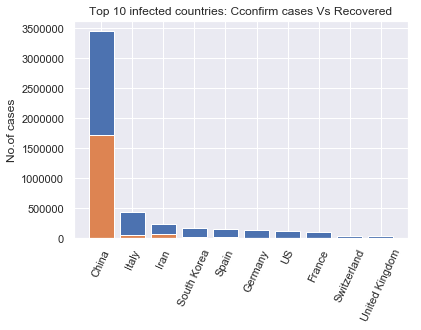

In [30]:
plt.bar(top_10['Country/Region'],top_10['Confirmed'])
plt.bar(top_10['Country/Region'],top_10['Recovered'])
plt.ylabel('No.of cases')
plt.title('Top 10 infected countries: Cconfirm cases Vs Recovered')
plt.xticks(rotation=65)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

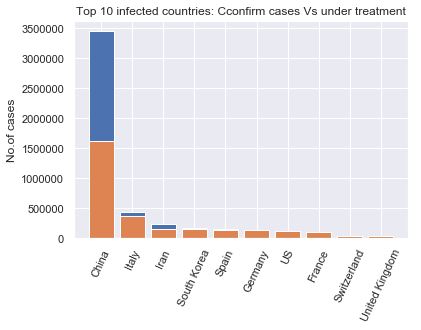

In [31]:
plt.bar(top_10['Country/Region'],top_10['Confirmed'])
plt.bar(top_10['Country/Region'],top_10['under_treatment'])
plt.ylabel('No.of cases')
plt.title('Top 10 infected countries: Cconfirm cases Vs under treatment')
plt.xticks(rotation=65)
plt.show

In [32]:
## Recovery rate
df_clean_country['Recovery rate %']=df_clean_country['Recovered']/df_clean_country['Confirmed']*100
df_clean_country.head()

,Country/Region,Confirmed,Deaths,Recovered,under_treatment,Recovery rate %
33,China,3449730,116138,1714398,1619194,49.696585
81,Italy,438821,33959,43930,360932,10.010916
77,Iran,231132,13124,71998,146010,31.150165
144,South Korea,172802,1439,14972,156391,8.664252
145,Spain,157432,7345,11793,138294,7.490853


In [33]:
df_clean_country['Death rate %']=df_clean_country['Deaths']/df_clean_country['Confirmed']*100
df_clean_country.head()

,Country/Region,Confirmed,Deaths,Recovered,under_treatment,Recovery rate %,Death rate %
33,China,3449730,116138,1714398,1619194,49.696585,3.366582
81,Italy,438821,33959,43930,360932,10.010916,7.738691
77,Iran,231132,13124,71998,146010,31.150165,5.678141
144,South Korea,172802,1439,14972,156391,8.664252,0.832745
145,Spain,157432,7345,11793,138294,7.490853,4.665506


In [34]:
top_10['Death rate %']=top_10['Deaths']/top_10['Confirmed']*100
top_10['Recovery rate %']=top_10['Recovered']/top_10['Confirmed']*100
top_10.head()

C:\Users\nanao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\nanao\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country/Region,Confirmed,Deaths,Recovered,under_treatment,Death rate %,Recovery rate %
33,China,3449730,116138,1714398,1619194,3.366582,49.696585
81,Italy,438821,33959,43930,360932,7.738691,10.010916
77,Iran,231132,13124,71998,146010,5.678141,31.150165
144,South Korea,172802,1439,14972,156391,0.832745,8.664252
145,Spain,157432,7345,11793,138294,4.665506,7.490853


Text(0.5, 1.0, ' Top 10 Infected country Deaths rate  in %')

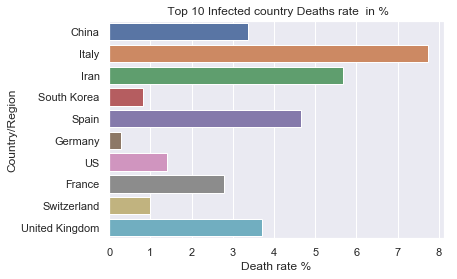

In [35]:
sns.barplot(y='Country/Region',x='Death rate %',data=top_10)
plt.title(' Top 10 Infected country Deaths rate  in %')


Text(0.5, 1.0, ' Top 10 Infected country Recovery rate  in %')

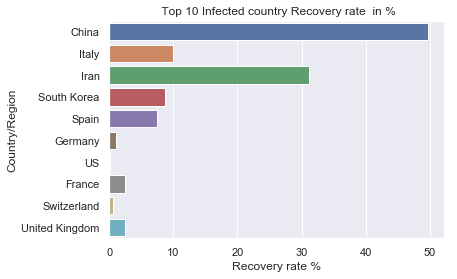

In [36]:
sns.barplot(y='Country/Region',x='Recovery rate %',data=top_10)
plt.title(' Top 10 Infected country Recovery rate  in %')

Observation:
<br>
From the above bar chart we can conclude the below points:
<br> 1) Fataility or death rate is very high in Italy even though China is having hishest confirmed cases
<br> 2) Recovery rate is almost 50% in china , however Italy has around 10% and Iran is having aorund 31 %

### How Covid_19 spread across the world

In [37]:
df_spread=df_clean.groupby(['Date','Country/Region'])['Confirmed','Recovered'].sum().reset_index()

In [38]:
df_spread.head()

,Date,Country/Region,Confirmed,Recovered
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0


In [39]:
print(df_spread.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 4 columns):
Date              10431 non-null datetime64[ns]
Country/Region    10431 non-null object
Confirmed         10431 non-null int64
Recovered         10431 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 326.0+ KB
None


In [40]:
#df_spread['Date']=df_spread['Date'].dt.strftime('%d%m%Y')
#df_spread.head()

In [41]:
df_spread['Confirmed_scale']=df_spread['Confirmed'].pow(0.45)
df_spread.head()

,Date,Country/Region,Confirmed,Recovered,Confirmed_scale
0,2020-01-22,Afghanistan,0,0,0.0
1,2020-01-22,Albania,0,0,0.0
2,2020-01-22,Algeria,0,0,0.0
3,2020-01-22,Andorra,0,0,0.0
4,2020-01-22,Angola,0,0,0.0


In [42]:

df_spread['Date'] = pd.to_datetime(df_spread['Date'])
df_spread['Date']=df_spread['Date'].dt.strftime('%d%m%Y')
df_spread.head()

,Date,Country/Region,Confirmed,Recovered,Confirmed_scale
0,22012020,Afghanistan,0,0,0.0
1,22012020,Albania,0,0,0.0
2,22012020,Algeria,0,0,0.0
3,22012020,Andorra,0,0,0.0
4,22012020,Angola,0,0,0.0


In [46]:
map_spread=px.scatter_geo(df_spread, locations='Country/Region',locationmode='country names',color='Confirmed',
                         size='Confirmed_scale',hover_name='Country/Region', range_color=[0,20000],
                          projection='natural earth', animation_frame='Date',color_continuous_scale="portland",title='Virus: How virus spread worldwide')

In [47]:
map_spread.show()

In [48]:
map_recovered=px.scatter_geo(df_spread, locations='Country/Region',locationmode='country names',color='Recovered',
                         size='Confirmed_scale',hover_name='Country/Region', range_color=[0,20000],
                          projection='natural earth', animation_frame='Date',color_continuous_scale="portland",title='Virus: How virus spread worldwide')
map_recovered.show()